# reduce number of 'negatives' 

Satelite data ranges further than the event data. 
For every event, we only want to keep satelite data within ±N years around the reported date. 
First attempt, we use 1 year


approach:
    1. for every district 
    2. for every event in this district 
    3. check the year of this event 
    4. only keep satelite data for if year is within [year - dyear, year + dyear] (with dyear=1)
    5. concatenate dataframes. Make sure to only keep the unique set of rows



In [62]:
print(len(districts_with_droughts[districts_with_droughts['drought_in_district']]['District'].unique()  ))

119


In [58]:
print(len(DroughtData[DroughtData['drought_reported']]['District'].unique()))

119


In [86]:
%matplotlib inline 
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 

# --- read original data (not reduced yet, used Z-normed dataset from start) ---- 
DroughtData = pd.read_csv('datasets/Droughts_satelite_and_events_Znormed.csv')
districts_with_droughts = pd.read_csv('datasets/districts_with_droughts_Uganda_Kenya.csv')
DroughtData.head()

,NDVI,EVI,precipitation_per_hour_v1,precipitation_per_hour_v2,surface_temperature_daytime,surface_temperature_nighttime,evapotranspiration,rainfall,SoilMoisture00_10cm,SoilMoisture10_40cm,...,SPEI_3month,SPEI_4month,SPEI_5month,SPEI_6month,SPEI_7month,SPEI_8month,SPEI_9month,SPEI_10month,SPEI_11month,SPEI_12month
0,-1.874641,-1.570809,-1.217134,-1.210825,1.914201,1.651377,-1.632338,-1.362386,-1.683524,-1.594857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.206775,-1.143460,0.554526,0.337322,1.068590,0.768848,0.343810,0.380445,-0.248744,-1.965811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.544968,0.484206,0.726150,0.654021,-0.209722,0.109642,1.241335,1.416795,0.717814,0.108791,...,0.075238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.853214,0.948032,0.974735,0.485003,-0.526822,-0.525072,0.585442,1.246105,0.707451,-0.143555,...,0.917779,0.711107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.180418,1.321811,0.368088,-0.002803,-1.099682,-1.324882,0.660043,1.021191,1.218931,1.271444,...,1.070958,0.836407,0.635385,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## discrepancy between recorded statelite data and event data 

In [21]:
for district in DroughtData['District'].unique():
    group = DroughtData[DroughtData['District']==district]
    
    print(district)
    print('Google Earth Engine data recorded between',group.year.min(), ' and', group.year.max())
    print('events recorded in',group[group.drought_reported].year.unique())
    print('\n')

ABIM
Google Earth Engine data recorded between 2000  and 2019
events recorded in [2002 2003 2009 2011 2012 2013 2017 2019]


ADJUMANI
Google Earth Engine data recorded between 2000  and 2019
events recorded in [2003]


ALEBTONG
Google Earth Engine data recorded between 2000  and 2019
events recorded in [2002 2019]


AMOLATAR
Google Earth Engine data recorded between 2000  and 2019
events recorded in [2011]


AMUDAT
Google Earth Engine data recorded between 2000  and 2019
events recorded in [2003 2011 2017 2019]


AMURIA
Google Earth Engine data recorded between 2000  and 2019
events recorded in [2009]


AMURU
Google Earth Engine data recorded between 2000  and 2019
events recorded in [2017]


ARUA
Google Earth Engine data recorded between 2000  and 2019
events recorded in [2003 2009 2011 2017]


BUDAKA
Google Earth Engine data recorded between 2000  and 2019
events recorded in [2009]


BUDUDA
Google Earth Engine data recorded between 2000  and 2019
events recorded in []


BUGIRI
Google

Google Earth Engine data recorded between 2000  and 2019
events recorded in [2011]


KABAROLE
Google Earth Engine data recorded between 2000  and 2019
events recorded in [2013]


MITYANA
Google Earth Engine data recorded between 2000  and 2019
events recorded in [2017]


ISINGIRO
Google Earth Engine data recorded between 2000  and 2019
events recorded in [2014 2015 2017]


MAYUGE
Google Earth Engine data recorded between 2000  and 2019
events recorded in [2010]


BUYENDE
Google Earth Engine data recorded between 2000  and 2019
events recorded in []


KAYUNGA
Google Earth Engine data recorded between 2000  and 2019
events recorded in [2002 2006]


NTOROKO
Google Earth Engine data recorded between 2000  and 2019
events recorded in [2012 2014]


KOTIDO
Google Earth Engine data recorded between 2000  and 2019
events recorded in [2002 2003 2011]


KAMULI
Google Earth Engine data recorded between 2000  and 2019
events recorded in []


BUKEDEA
Google Earth Engine data recorded between 2000  a

# determine rows you want to keep 

In [82]:
def rows_to_keep(data, event_index, district, keep_years=1):
    '''
    given the row of full dataframe containing the event, return the rows you want to keep
    '''
    event_year = data.iloc[event_index]['year']
    DistrictData = data[data['District']==district]    
    KeepData = DistrictData[ (DistrictData['year'] >= (event_year - keep_years)) &
                           (DistrictData['year'] <= (event_year + keep_years))]
        
    return list(KeepData.index)
    

    
# --- loop over all districts that have a drought recorded ---- 
keepsies = []
for district in districts_with_droughts[districts_with_droughts['drought_in_district']]['District']:    
    group = DroughtData[DroughtData['District']==district]
    
    # -- loop over recorded events for this district ---- 
    for event_index in group[group['drought_reported']].index:
        to_keep = rows_to_keep(data=DroughtData, event_index=event_index, district=district)
        keepsies += to_keep
    
    
# --- only need unique set of rows (rows may be kept due to multiple drought events) ---- 
keepsies = np.unique(keepsies)
    
reduced_data = DroughtData.iloc[keepsies]
reduced_data.to_csv('datasets/Droughts_satelite_and_events_Znormed_ReducedNegatives.csv',index=False)


print('length original data: ', len(DroughtData))
print('length reduced data: ', len(reduced_data))




    
    
# keepsies = rows_to_keep(data=DroughtData, 
#                        event_index=22,
#                        district='ABIM')


# print(keepsies)

# DroughtData.iloc[keepsies][['year','drought_reported']]

length original data:  39532
length reduced data:  7871


# Did correlation improve ? 

/Users/mklein1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/mklein1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/mklein1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until 

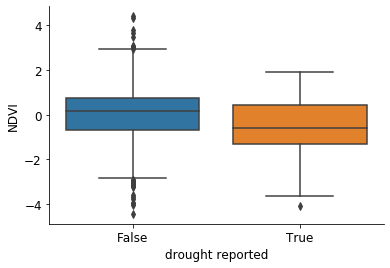

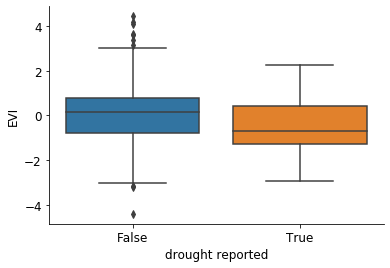

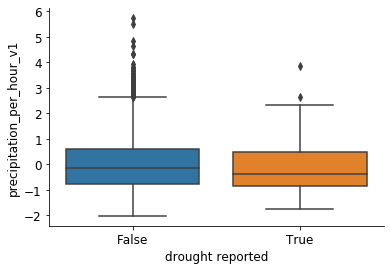

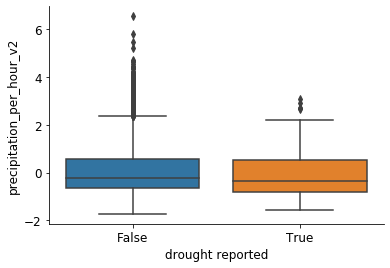

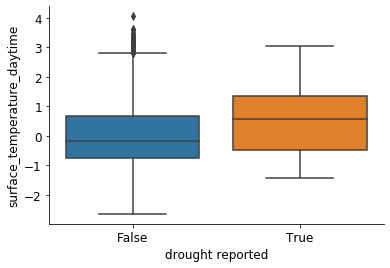

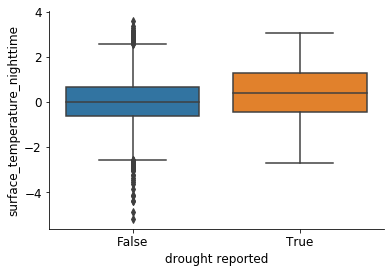

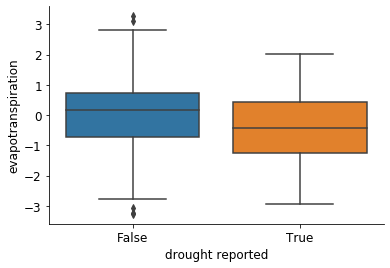

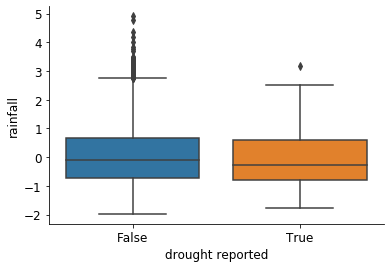

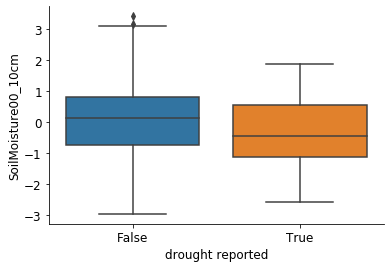

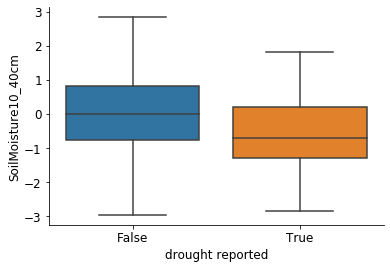

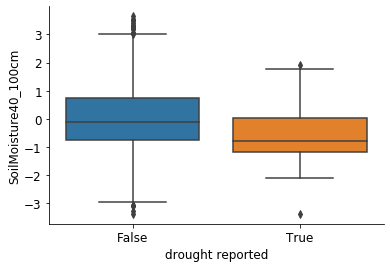

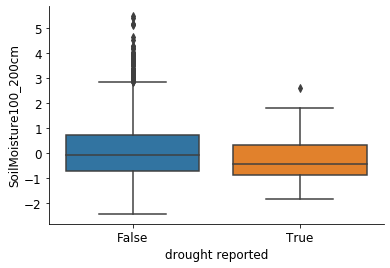

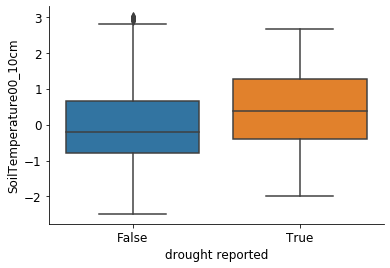

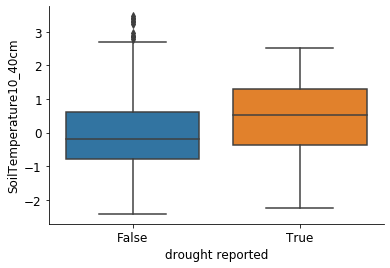

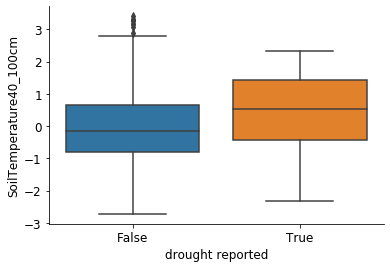

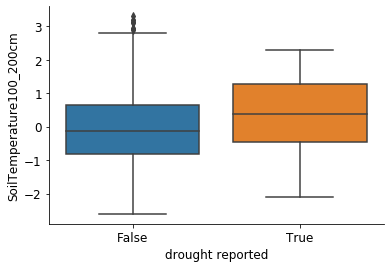

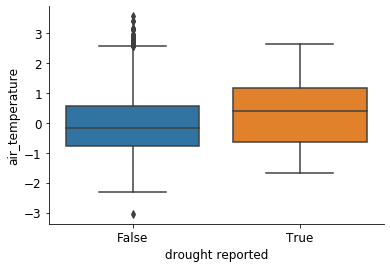

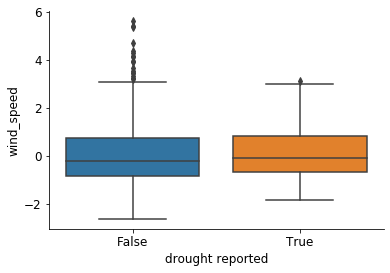

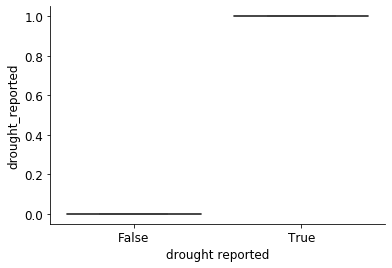

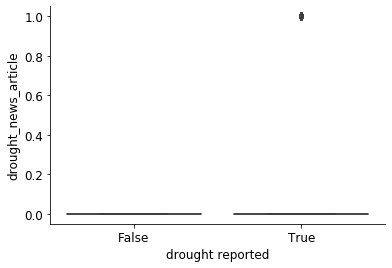

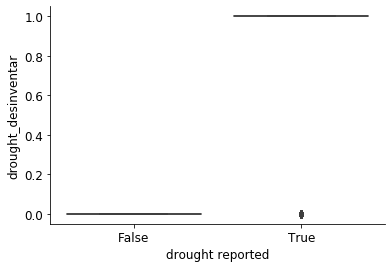

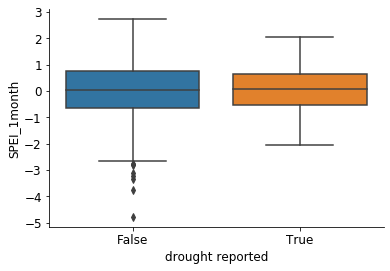

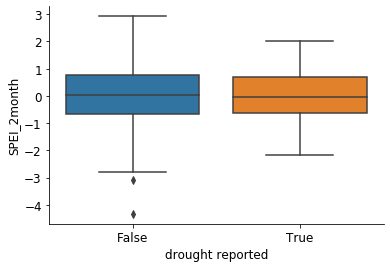

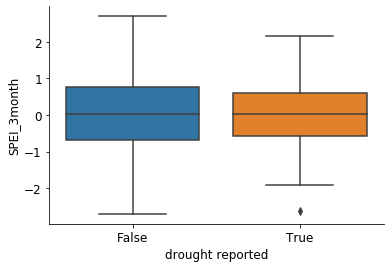

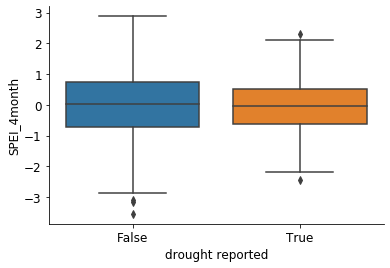

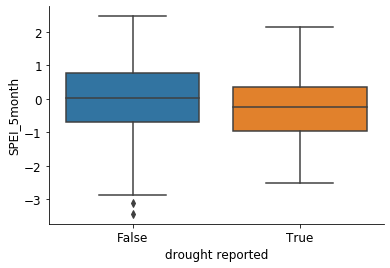

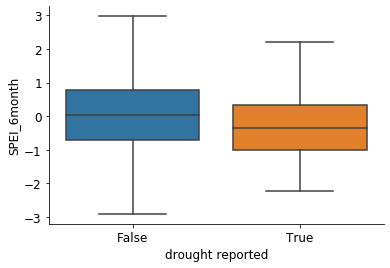

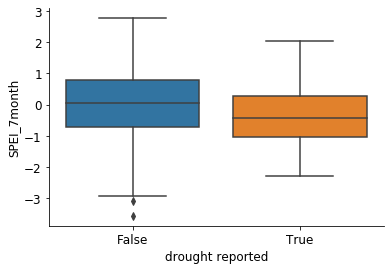

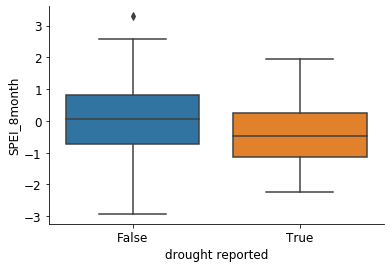

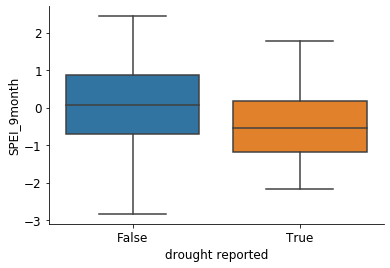

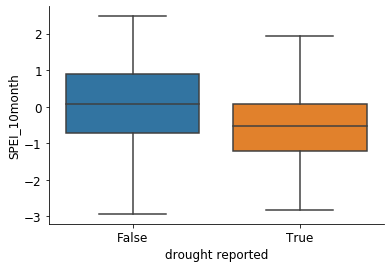

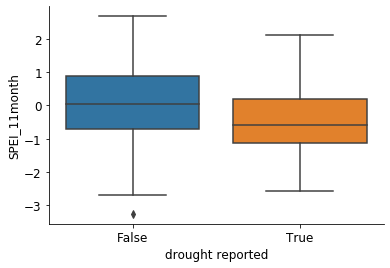

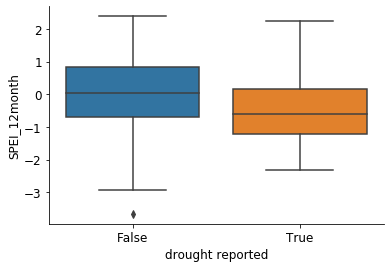

In [87]:
indicators = list(reduced_data.columns.drop(['Country','District','date','day','month','year']))

for var in indicators:
    plt.figure()
    sns.boxplot(x='drought_reported',y=var,data=reduced_data);
    plt.xlabel('drought reported', fontsize=12,color='black')
    plt.ylabel(var, fontsize=12, color="black")
    plt.xticks(rotation=0,fontsize=12, color="black")
    plt.yticks(fontsize=12, color="black");
    sns.despine();

In [31]:
DroughtData.iloc[[22,41]]

22    2002
41    2003
Name: year, dtype: int64